## **Question 1 - XOR Gate Classification**

In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# XOR gate truth table
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

In [33]:
# McCulloch-Pitts Neuron
class MCPNeuron:
    def __init__(self, num_inputs):
        self.weights = np.random.randn(num_inputs)
        self.bias = np.random.randn()

    def activate(self, x):
        return 1 if np.dot(x, self.weights) + self.bias > 0 else 0

In [34]:
# Single Layer Perceptron (SLP)

class SLP:
    def __init__(self):
        self.neuron = MCPNeuron(2)

    def predict(self, x):
        return self.neuron.activate(x)

    def train(self, X, y, epochs=100, learning_rate=0.1):
        for _ in range(epochs):
            for x, target in zip(X, y):
                prediction = self.predict(x)
                error = target - prediction
                self.neuron.weights += learning_rate * error * x
                self.neuron.bias += learning_rate * error

In [35]:
# Training and testing SLP
slp = SLP()
slp.train(X, y, epochs=1000)

print("SLP predictions:")
for x in X:
    print(f"Input: {x}, Prediction: {slp.predict(x)}")

SLP predictions:
Input: [0 0], Prediction: 1
Input: [0 1], Prediction: 1
Input: [1 0], Prediction: 0
Input: [1 1], Prediction: 0


In [38]:
# Multi-Layer Perceptron (MLP)

class MLP:
    def __init__(self):
        self.hidden_layer = [MCPNeuron(2) for _ in range(2)]
        self.output_neuron = MCPNeuron(2)

    def predict(self, x):
        hidden_outputs = [neuron.activate(x) for neuron in self.hidden_layer]
        return self.output_neuron.activate(hidden_outputs)

    def train(self, X, y, epochs=100, learning_rate=0.1):
        for _ in range(epochs):
            for x, target in zip(X, y):

                # Forward pass
                hidden_outputs = [neuron.activate(x) for neuron in self.hidden_layer]
                final_output = self.output_neuron.activate(hidden_outputs)

                # Backward pass
                error = target - final_output

                # Updating output neuron
                self.output_neuron.weights += learning_rate * error * np.array(hidden_outputs)
                self.output_neuron.bias += learning_rate * error

                # Updating hidden neurons
                for i, neuron in enumerate(self.hidden_layer):
                    neuron.weights += learning_rate * error * self.output_neuron.weights[i] * x
                    neuron.bias += learning_rate * error * self.output_neuron.weights[i]

In [39]:
# Training and testing MLP
mlp = MLP()
mlp.train(X, y, epochs=10000)

print("\nMLP predictions:")
for x in X:
    print(f"Input: {x}, Prediction: {mlp.predict(x)}")


MLP predictions:
Input: [0 0], Prediction: 0
Input: [0 1], Prediction: 0
Input: [1 0], Prediction: 0
Input: [1 1], Prediction: 0


In [40]:
# Visualization of decision boundaries

def plot_decision_boundary(model, title):
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = np.array([model.predict(x) for x in np.c_[xx.ravel(), yy.ravel()]])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(title)
    plt.show()

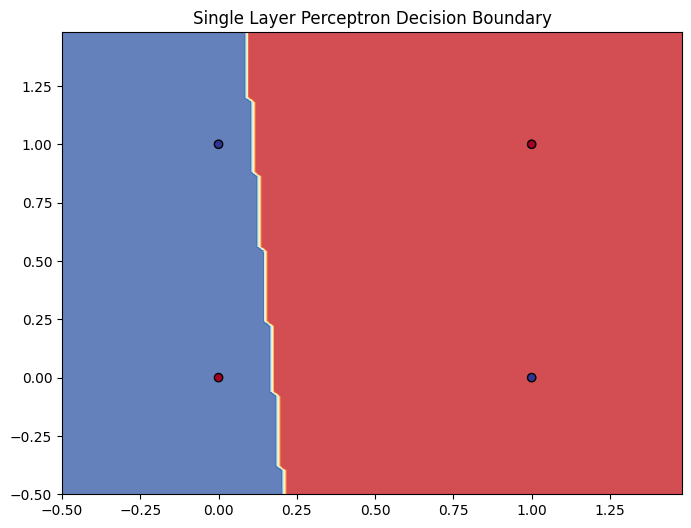

In [41]:
plot_decision_boundary(slp, "Single Layer Perceptron Decision Boundary")

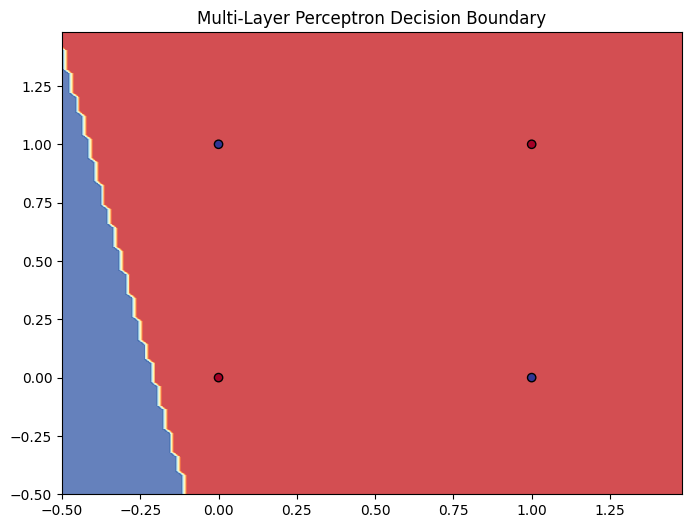

In [42]:
plot_decision_boundary(mlp, "Multi-Layer Perceptron Decision Boundary")

As we can see, the MLP fails to properly perform the classification as well. Thus, we will now make use of an improved MCP neuron using sigmoid activation.

In [44]:
# Improved Neuron (using sigmoid activation)
class ImprovedNeuron:
    def __init__(self, num_inputs):
        self.weights = np.random.randn(num_inputs)
        self.bias = np.random.randn()

    def activate(self, x):
        return 1 / (1 + np.exp(-np.dot(x, self.weights) - self.bias))

In [45]:
# Multi-Layer Perceptron
class MLP:
    def __init__(self):
        self.hidden_layer = [ImprovedNeuron(2) for _ in range(2)]
        self.output_neuron = ImprovedNeuron(2)

    def forward(self, x):
        hidden_outputs = [neuron.activate(x) for neuron in self.hidden_layer]
        return self.output_neuron.activate(hidden_outputs), hidden_outputs

    def predict(self, x):
        output, _ = self.forward(x)
        return round(output)

    def train(self, X, y, epochs=10000, learning_rate=0.1):
        for _ in range(epochs):
            for x, target in zip(X, y):

                # Forward pass
                output, hidden_outputs = self.forward(x)

                # Backward pass
                output_error = target - output
                output_delta = output_error * output * (1 - output)

                # Updating output neuron
                self.output_neuron.weights += learning_rate * output_delta * np.array(hidden_outputs)
                self.output_neuron.bias += learning_rate * output_delta

                # Updating hidden neurons
                for i, neuron in enumerate(self.hidden_layer):
                    hidden_error = output_delta * self.output_neuron.weights[i]
                    hidden_delta = hidden_error * hidden_outputs[i] * (1 - hidden_outputs[i])
                    neuron.weights += learning_rate * hidden_delta * x
                    neuron.bias += learning_rate * hidden_delta

In [46]:
# Training and testing the new MLP
mlp = MLP()
mlp.train(X, y)

print("\nMLP predictions:")
for x in X:
    print(f"Input: {x}, Prediction: {mlp.predict(x)}")


MLP predictions:
Input: [0 0], Prediction: 0
Input: [0 1], Prediction: 1
Input: [1 0], Prediction: 1
Input: [1 1], Prediction: 0


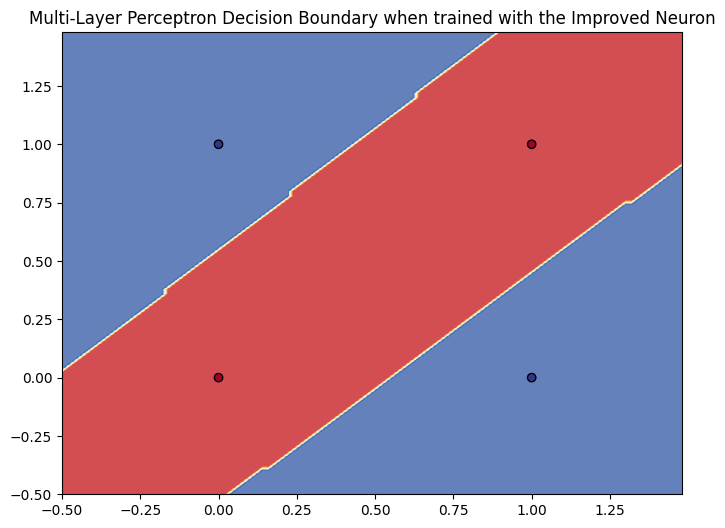

In [47]:
plot_decision_boundary(mlp, "Multi-Layer Perceptron Decision Boundary when trained with the Improved Neuron")

#### **Insights:**

**Single Layer Perceptron (SLP):**
- The SLP fails to correctly classify all points. This is because the XOR problem is not linearly separable, and a single-layer perceptron can only learn linear decision boundaries.
- SLP's predictions don't match the XOR truth table for all inputs. This is a limitation of the SLP for this particular problem.
- The decision boundary visualization for the SLP will show a single straight line, which cannot correctly separate all four points of the XOR problem.

**Multi-Layer Perceptron (MLP):**

- The MLP, with its hidden layer and added sigmoid function, is capable of learning non-linear decision boundaries. As a result, it can correctly classify all points in the XOR problem.
- The MLP's predictions match the XOR truth table for all inputs.
- The decision boundary visualization for the MLP will show a non-linear boundary that correctly separates all four points of the XOR problem.

## **Question 2B - Sentiment Analysis Using ANN on IMDb Movie Reviews**

In [86]:
# Importing the required libraries into the workspace
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [51]:
# Downloading NLTK data
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [58]:
# Loading the dataset
df = pd.read_csv('IMDB.csv')
df = df.head(1000)

In [59]:
# Exploratory Data Analysis (EDA)
print("Dataset Shape:")
print(df.shape)
print("\nFirst few rows of the Dataset:")
print(df.head())
print("\nDataset Summary:")
print(df.describe())
print("\nDataset Information:")
print(df.info())
print("\nDataset Class Balance:")
print(df['sentiment'].value_counts())

Dataset Shape:
(1000, 2)

First few rows of the Dataset:
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

Dataset Summary:
                                                   review sentiment
count                                                1000      1000
unique                                               1000         2
top     One of the other reviewers has mentioned that ...  positive
freq                                                    1       501

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0

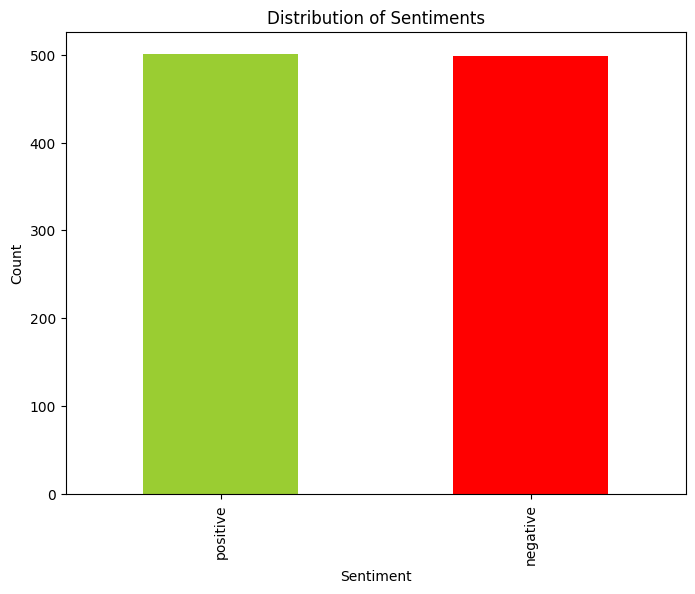

In [87]:
# Visualizing the distribution of sentiments
plt.figure(figsize=(8, 6))
df['sentiment'].value_counts().plot(kind='bar', color=['yellowgreen', 'red'])
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

1. **Data Loading and Exploration:** We start by loading the IMDB dataset and performing some basic exploratory data analysis. This helps us understand the structure of our data and the distribution of sentiments.
2. **Text Preprocessing:** We preprocess the text data by converting to lowercase, removing HTML tags and special characters, tokenizing, removing stopwords, and lemmatizing. This step is need for reducing noise in the data and improving the model's ability to learn meaningful patterns.
3. **Label Encoding:** We encode the sentiment labels (positive/negative) into numerical values (0/1) using LabelEncoder. This is necessary for binary classification.
4. **Data Splitting:** We split the data into training and testing sets to evaluate our model's performance on unseen data.
5. **Tokenization and Padding:** We use Keras' Tokenizer to convert our text data into sequences of integers. We then pad these sequences to ensure all inputs have the same length, which is required for our neural network.


In [64]:
# Preprocessing the text data
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize the text
    tokens = text.split()
    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['cleaned_review'] = df['review'].apply(preprocess_text)

In [65]:
# Encoding the sentiment labels
le = LabelEncoder()
df['sentiment_encoded'] = le.fit_transform(df['sentiment'])

In [66]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_review'], df['sentiment_encoded'], test_size=0.2, random_state=42)

In [67]:
# Tokenizing and padding the sequences
max_words = 10000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

**Model Architecture:**

Our ANN model consists of:
- An Embedding layer to learn word representations
- 2 LSTM layers for capturing sequential information in the text
- A Dense layer with ReLU activation
- A Dropout layer to prevent overfitting
- A final Dense layer with sigmoid activation for binary classification

We'll use **ReLU activation** in the hidden layer because it introduces non-linearity without affecting the receptive fields of the convolution layer and is computationally efficient.

We'll use **sigmoid activation** in the output layer because it limits the output between 0 and 1, which is ideal for binary classification and also represents the probability of the positive class.

We'll use **binary cross-entropy** as the loss function because it is suitable for binary classification problems, it can easily measure the performance of a classification model whose output is a probability value between 0 and 1, and helps in training a more robust model.

We'll train the model using the **Adam optimizer** and implement **early stopping** to prevent overfitting.

In [85]:
# Building the ANN model
model = Sequential([
    Embedding(max_words, 128, input_length=max_len),
    LSTM(64, return_sequences=True),
    LSTM(32),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [88]:
# Training the model
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train_pad, y_train, epochs=10, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 56s 382ms/step - accuracy: 0.5330 - loss: 0.6930 - val_accuracy: 0.5063 - val_loss: 0.6926
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 289ms/step - accuracy: 0.6045 - loss: 0.6896 - val_accuracy: 0.6000 - val_loss: 0.6864
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 274ms/step - accuracy: 0.8742 - loss: 0.6538 - val_accuracy: 0.6625 - val_loss: 0.6153
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 471ms/step - accuracy: 0.9328 - loss: 0.3920 - val_accuracy: 0.7688 - val_loss: 0.5755
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 270ms/step - accuracy: 0.9810 - loss: 0.1723 - val_accuracy: 0.6938 - val_loss: 1.0677
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 272ms/step - accuracy: 0.9772 - loss: 0.1537 - val_accuracy: 0.7312 - val_loss: 0.8684
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 431ms/step - accuracy: 0.9957 - loss: 0.0437 - val_accuracy: 0.7875 - val_loss: 0.8319


In [90]:
# Evaluating the model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7765 - loss: 0.5003
Test Loss: 0.4912
Test Accuracy: 0.7700


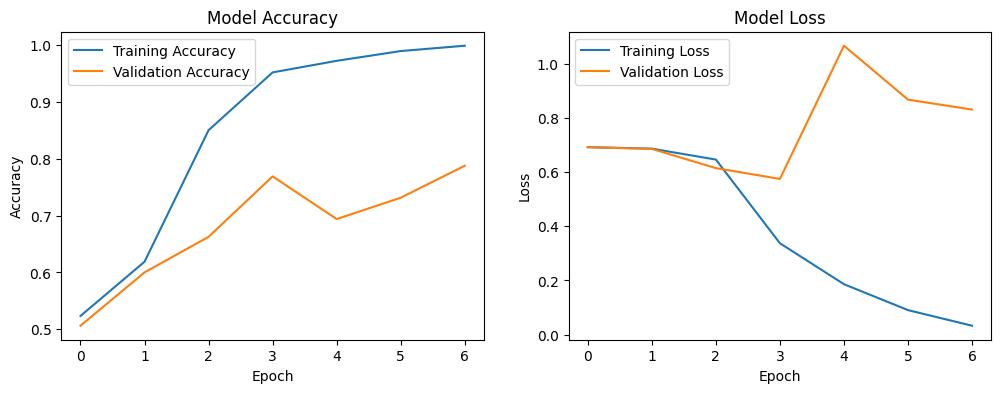

In [93]:
# Plotting the training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [95]:
# Model Evaluation
y_pred_prob = model.predict(X_test_pad)
y_pred = (y_pred_prob > 0.5).astype(int)

print("\nAccuracy on Test Data: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step

Accuracy on Test Data: 77.00%

Classification Report:
              precision    recall  f1-score   support

    Negative       0.73      0.89      0.80       104
    Positive       0.85      0.64      0.73        96

    accuracy                           0.77       200
   macro avg       0.79      0.76      0.76       200
weighted avg       0.78      0.77      0.77       200




Confusion Matrix:


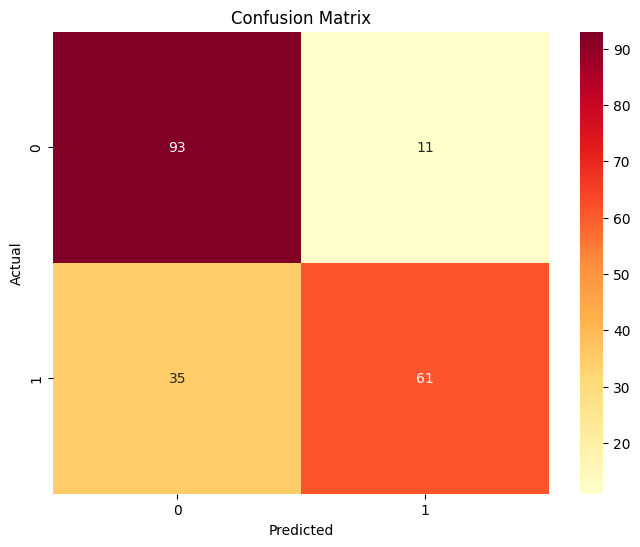

In [96]:
# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrRd')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [97]:
# Making predictions on a sample review, taken from the dataset
sample_review = "This has to be one of the biggest misfires ever...the script was nice and could have ended a lot better. the actors should have played better and maybe then i would have given this movie a slightly better grade. maybe Hollywood should remake this movie with some little better actors and better director.sorry guys for disappointment but the movie is bad. If i had to re-watch it it would be like torture. I do not want to spoil the opinion of everyone with mine so..my advice is watch the movie first..see if u like it and after vote (do not vote before you watch it ! ) and by the way... Have fun watching it ! Don't just peek...watch it 'till the end !!"
preprocessed_review = preprocess_text(sample_review)
sample_seq = tokenizer.texts_to_sequences([preprocessed_review])
sample_pad = pad_sequences(sample_seq, maxlen=max_len)
prediction = model.predict(sample_pad)[0][0]
print(f"Sample Review: {sample_review}")
print(f"Sentiment Prediction: {'Positive' if prediction > 0.5 else 'Negative'} (Probability: {prediction:.4f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Sample Review: This has to be one of the biggest misfires ever...the script was nice and could have ended a lot better. the actors should have played better and maybe then i would have given this movie a slightly better grade. maybe Hollywood should remake this movie with some little better actors and better director.sorry guys for disappointment but the movie is bad. If i had to re-watch it it would be like torture. I do not want to spoil the opinion of everyone with mine so..my advice is watch the movie first..see if u like it and after vote (do not vote before you watch it ! ) and by the way... Have fun watching it ! Don't just peek...watch it 'till the end !!
Sentiment Prediction: Negative (Probability: 0.2034)
